In [ ]:
%matplotlib inline

from sklearn.preprocessing import Imputer
from HelperClass import HelperClass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_tree

import seaborn as sns
sns.set(style='darkgrid')


trainData = pd.read_csv('./train_u6lujuX_CVtuZ9i.csv')
trainData.shape

trainData.head(10)

In [ ]:
# Missing Value
miss_data = trainData.isnull().sum(axis=0)
print(miss_data)

In [ ]:
#------------------------------------------------ X_train Data ----------------------------------------------------------------#

#---------------- Fill Mising Values--------------------------------#
## Gender Column
trainData['Gender'].fillna('Other', inplace = True)

## Married Column
trainData['Married'].fillna('Yes', inplace = True)

## Dependents Column
trainData['Dependents'].fillna('4', inplace = True)

## Self_Employed Column
trainData['Self_Employed'].fillna('Yes', inplace = True)

## LoanAmount Column
trainData['LoanAmount'].fillna((trainData['LoanAmount'].mean()), inplace = True)

## Loan_Amount_Term Column
trainData['Loan_Amount_Term'].fillna((trainData['Loan_Amount_Term'].mean()), inplace = True)

## Credit_History Column
trainData['Credit_History'].fillna((trainData['Credit_History'].mean()), inplace = True)

# Missing Value After filled
miss_data = trainData.isnull().sum(axis=0)
print(miss_data)

In [ ]:
trainData['Gender'] = trainData['Gender'].map({'Female' : 0, 'Male' : 1})
trainData['Married'] = trainData['Married'].map({'No':0, 'Yes':1})
trainData['Education'] = trainData['Education'].map({'Not Graduate':0, 'Graduate':1})
trainData['Self_Employed'] = trainData['Self_Employed'].map({'No':0, 'Yes':1})
trainData['Property_Area'] = trainData['Property_Area'].map({'Urban':3, 'Semiurban':2, 'Rural':1})
trainData['Loan_Status'] = trainData['Loan_Status'].map({'N' : 0, 'Y' : 1})

In [ ]:
sns.barplot(x = 'Gender', y ='Loan_Status', data=trainData)

In [ ]:
sns.barplot(x = 'Education', y ='Loan_Status', data=trainData)

In [ ]:
sns.barplot(x = 'Education', y ='Loan_Status', data=trainData)

In [ ]:
sns.barplot(x = 'Self_Employed', y ='Loan_Status', data=trainData)

In [ ]:
sns.barplot(x = 'Property_Area', y ='Loan_Status', data=trainData)

In [ ]:
sns.barplot(x='Credit_History', y='Loan_Status', data=trainData)

In [ ]:
#---------------- Label Encoding Values--------------------------------

# Label Encoding categorical data
X = trainData.iloc[:,1:12].values
y = trainData.iloc[:, 12].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from HelperClass import HelperClass

labelencoder_X_2 = LabelEncoder()

# Gender Column
X[:, 0] = labelencoder_X_2.fit_transform(X[:, 0])

# Married Column
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])

# Dependents Column
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

# Self_Employed Column
X[:, 3] = labelencoder_X_2.fit_transform(X[:, 3])

# Education Column
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

# Property Area Column
X[:, 10] = labelencoder_X_2.fit_transform(X[:, 10])

X

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer with dropout 
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
#classifier.add(Dropout(p = 0.1))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dropout(p = 0.1))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X, y, batch_size = 20, epochs = 100)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred = y_pred[:,0]
y_pred = (y_pred > 0.5)
#result = (y_pred == y_test).sum()


new_pred = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_pred = (new_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Dummy Variables

# Load Status Column
y = labelencoder_X_2.fit_transform(y)

# Gender Column
oneHotEncoder_X_2 = OneHotEncoder(categorical_features=[0])
X = oneHotEncoder_X_2.fit_transform(X).toarray()


# Gender Column
oneHotEncoder_X_2 = OneHotEncoder(categorical_features=[4])
X = oneHotEncoder_X_2.fit_transform(X).toarray()


oneHotEncoder_X_2 = OneHotEncoder(categorical_features=[16])
X = oneHotEncoder_X_2.fit_transform(X).toarray()

In [ ]:
# Feature Extraction


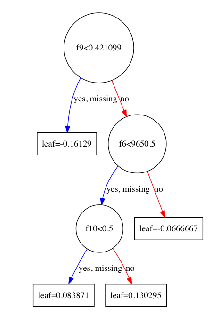

Accuracy: 86.99%


In [37]:
# Feature Selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

from sklearn.ensemble import RandomForestClassifier
from  EstimatorSelectionHelper import EstimatorSelectionHelper
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.metrics import accuracy_score

#models = {
#            'RandomForestClassifier' : RandomForestClassifier()
#            }
#    
#parameter = {
#            'RandomForestClassifier' : { 'max_depth' : [2,5,7,9],
#                                        'n_estimators': [200, 700],
#                                        'max_features': ['auto', 'sqrt', 'log2'],
#                                        'criterion' : ['gini', 'entropy']}
#            }
    
#classifier = EstimatorSelectionHelper(models, parameter)
#classifier.fit(X, y, scoring='f1', cv = 3, n_jobs=1,refit=True,verbose=2)
#
#result.to_csv('test', sep='\t', encoding='utf-8')
#
#from prettytable import PrettyTable
#from prettytable import from_csv
#fp = open("test", "r")
#mytable = from_csv(fp)
#print(mytable)
#     
#
#for tempObj in parameter.keys():
#    y_pred = classifier.predict_on_bestEstimator(X_test,'RandomForestClassifier')
#    print("%s Predition on Test Data" % tempObj)
#    cm = classifier.confusionMatrix(y_test,y_pred)
#    plt.figure()
#    classifier.plot_confusion_matrix(cm, classes=['class 0','class 1'],
#                      title='Confusion matrix, without normalization')
#
#    classifier.plotConfusionMatrix(cm)

classifier = XGBClassifier()
classifier.fit(X,y)
y_pred = classifier.predict(X_test)

plot_tree(classifier)
plt.show()

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#------------------------------------------------ X_train Data ----------------------------------------------------------------#

In [ ]:
#------------------------------------------------ X_test Data ----------------------------------------------------------------#

#---------------- Fill Mising Values--------------------------------#
originalTestData = pd.read_csv('./test_Y3wMUE5_7gLdaTN.csv')
# Missing Value
miss_data = originalTestData.isnull().sum(axis=0)
print(miss_data)

## Gender Column
originalTestData['Gender'].fillna('Other', inplace = True)

## Dependents Column
originalTestData['Dependents'].fillna('4', inplace = True)

## Self_Employed Column
originalTestData['Self_Employed'].fillna('Yes', inplace = True)

## LoanAmount Column
originalTestData['LoanAmount'].fillna((originalTestData['LoanAmount'].mean()), inplace = True)

## Loan_Amount_Term Column
originalTestData['Loan_Amount_Term'].fillna((originalTestData['Loan_Amount_Term'].mean()), inplace = True)

## Credit_History Column
originalTestData['Credit_History'].fillna((originalTestData['Credit_History'].mean()), inplace = True)

#---------------- Fill Mising Values--------------------------------

In [ ]:
# Label Encoding categorical data
X_test = originalTestData.iloc[:,1:12].values

# Gender Column
X_test[:, 0] = labelencoder_X_2.fit_transform(X_test[:, 0])

# Married Column
X_test[:, 1] = labelencoder_X_2.fit_transform(X_test[:, 1])

# Dependents Column
X_test[:, 2] = labelencoder_X_2.fit_transform(X_test[:, 2])

# EducationColumn
X_test[:, 3] = labelencoder_X_2.fit_transform(X_test[:, 3])

# Self_Employed  Column
X_test[:, 4] = labelencoder_X_2.fit_transform(X_test[:, 4])

# Property Area Column
X_test[:, 10] = labelencoder_X_2.fit_transform(X_test[:, 10])

In [ ]:
# Dummy Variables

In [ ]:
# Gender Column
#oneHotEncoder_X_2 = OneHotEncoder(categorical_features=[0])
#X_test = oneHotEncoder_X_2.fit_transform(X_test).toarray()


# Gender Column
#oneHotEncoder_X_2 = OneHotEncoder(categorical_features=[4])
#X_test = oneHotEncoder_X_2.fit_transform(X_test).toarray()

# Gender Column
#oneHotEncoder_X_2 = OneHotEncoder(categorical_features=[16])
#X_test = oneHotEncoder_X_2.fit_transform(X_test).toarray()

#y_pred_Train = classifier.predict_on_bestEstimator(X_test,'RandomForestClassifier')

y_pred_Train = classifier.predict(X_test)



y_pred_Train = ["Y" if i == 1 else "N" for i in y_pred_Train]
pd.DataFrame({"Loan_ID" : originalTestData.Loan_ID, "Loan_Status" : y_pred_Train}).to_csv('sample_submission.csv', index=False)
result = classifier.score_summary(sort_by='min_score')
